Image Augmentation

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)

In [3]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train = train_datagen.flow_from_directory(r"D:\Fertilizer\flowers\Train",target_size=(64,64),batch_size=32,class_mode="categorical")

Found 3883 images belonging to 5 classes.


In [5]:
test = test_datagen.flow_from_directory(r"D:\Fertilizer\flowers\Test",target_size=(64,64),batch_size=32,class_mode="categorical")

Found 434 images belonging to 5 classes.


In [6]:
train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

Create Model

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [8]:
model = Sequential()

Add Layers

In [9]:
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [10]:
#Convolution
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation="relu"))

#MaxPooling
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten
model.add(Flatten())

#Dense
#Hidden Layer 1
model.add(Dense(units=400,kernel_initializer="random_uniform",activation="relu"))
#Hidden Layer 2
model.add(Dense(units=200,kernel_initializer="random_uniform",activation="relu"))

#Output
model.add(Dense(units=5,kernel_initializer="random_uniform",activation="softmax"))


Compile The Model

In [11]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

Fit The Model

In [14]:
model.fit_generator(train,steps_per_epoch=39,epochs=25,validation_data=test,validation_steps=10) 

C:\Users\MESAVARAJ\AppData\Local\Temp\ipykernel_9820\1330236548.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train,steps_per_epoch=39,epochs=25,validation_data=test,validation_steps=10)


Epoch 1/25
39/39 [==============================] - 84s 2s/step - loss: 1.4609 - accuracy: 0.3542 - val_loss: 1.3004 - val_accuracy: 0.4000
Epoch 2/25
39/39 [==============================] - 46s 1s/step - loss: 1.2342 - accuracy: 0.4588 - val_loss: 1.2613 - val_accuracy: 0.5063
Epoch 3/25
39/39 [==============================] - 45s 1s/step - loss: 1.1494 - accuracy: 0.5264 - val_loss: 1.3572 - val_accuracy: 0.4531
Epoch 4/25
39/39 [==============================] - 31s 780ms/step - loss: 1.0977 - accuracy: 0.5529 - val_loss: 1.2088 - val_accuracy: 0.5156
Epoch 5/25
39/39 [==============================] - 25s 631ms/step - loss: 1.1297 - accuracy: 0.5444 - val_loss: 1.4014 - val_accuracy: 0.4688
Epoch 6/25
39/39 [==============================] - 23s 593ms/step - loss: 1.0698 - accuracy: 0.5761 - val_loss: 1.2220 - val_accuracy: 0.5094
Epoch 7/25
39/39 [==============================] - 22s 571ms/step - loss: 1.0274 - accuracy: 0.5962 - val_loss: 1.2148 - val_accuracy: 0.5719
Epoch 8/

Save The Model

In [15]:
model.save("Flowers.h5")

Test The Model

In [16]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [17]:
#Reading image_1
img = image.load_img("2682566502_967e7eaa2a.jpg",target_size=(64,64))

In [20]:
#Convertinng image to array
x = image.img_to_array(img)

#Expanding dimensions
x = np.expand_dims(x,axis=0)

#predicting higher propability index
pred_prob = model.predict(x)

#Creating List
class_name = ['daisy','dandelion','rose','sunflower','tulip']
pred_id = pred_prob.argmax(axis=1)[0]

1/1 [==============================] - 0s 61ms/step


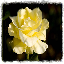

In [22]:
img

In [23]:
#List indexing with output
print("the flower is",str(class_name[pred_id]))

the flower is rose


In [24]:
#Reading image_2
img = image.load_img("40410814_fba3837226_n.jpg",target_size=(64,64))

In [25]:
#Convertinng image to array
x = image.img_to_array(img)

#Expanding dimensions
x = np.expand_dims(x,axis=0)

#predicting higher propability index
pred_prob = model.predict(x)

#Creating List
class_name = ['daisy','dandelion','rose','sunflower','tulip']
pred_id = pred_prob.argmax(axis=1)[0]

1/1 [==============================] - 0s 57ms/step


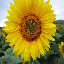

In [26]:
img

In [28]:
#List indexing with output
print("the flower is",str(class_name[pred_id]))

the flower is sunflower
